In [2]:
import numpy as np
import pandas as pd
import datetime
import sqlite3

In [62]:
tradesTaken = pd.read_csv("tradesTakenGrid100.csv")

In [66]:
tradesTaken['strikeGain'] = (tradesTaken['gainCE'] + tradesTaken['gainPE'])*-50

In [67]:
tradesTaken.head()

,Unnamed: 0,level_0,index,date,time,symbol,open,high,low,close,...,strikePrice,entryPriceCE,exitPriceCE,gainCE,exitTimeCE,entryPricePE,exitPricePE,gainPE,exitTimePE,strikeGain
0,0,15,492,2019-02-11,09:30:00,NIFTY,10880.40,10880.40,10874.05,10877.25,...,10900,-53.00,59.55,6.55,15:29:00,-75.40,47.45,-27.95,15:29:00,1070.0
1,0,15,499,2020-01-01,09:30:00,NIFTY,12221.65,12221.90,12218.60,12219.05,...,12200,-41.60,24.25,-17.35,15:29:00,-26.35,26.60,0.25,15:29:00,855.0
2,0,15,483,2020-01-02,09:30:00,NIFTY,12224.25,12228.50,12223.35,12228.45,...,12200,-33.55,82.45,48.90,15:29:00,-11.65,0.05,-11.60,15:29:00,-1865.0
3,0,15,566,2020-01-03,09:30:00,NIFTY,12251.25,12251.25,12242.25,12242.50,...,12300,-35.80,29.75,-6.05,15:29:00,-93.65,122.85,29.20,14:50:00,-1157.5
4,1,335,10863,2020-01-03,14:50:00,NIFTY,12205.00,12205.00,12195.15,12197.20,...,12200,-63.30,76.00,12.70,15:29:00,-61.30,50.80,-10.50,15:29:00,-110.0


In [99]:
dayGain = {}
dayGain['date'] = []
dayGain['gain'] = []
dayGain['nTrades'] = []

In [100]:
for eachDate in tradesTaken.date.unique()[:2]:
    tempdf = tradesTaken[tradesTaken['date'] == eachDate]
    print(tempdf.head())
    perDayGain = tempdf['strikeGain'].sum()
    dayGain['nTrades'] = len(tempdf)
    dayGain['date'].append(str(eachDate))
    dayGain['gain'].append(perDayGain)

   Unnamed: 0  level_0  index        date      time symbol     open     high  \
0           0       15    492  2019-02-11  09:30:00  NIFTY  10880.4  10880.4   

        low     close  ...  strikePrice  entryPriceCE  exitPriceCE  gainCE  \
0  10874.05  10877.25  ...        10900         -53.0        59.55    6.55   

   exitTimeCE  entryPricePE exitPricePE  gainPE  exitTimePE  strikeGain  
0    15:29:00         -75.4       47.45  -27.95    15:29:00      1070.0  

[1 rows x 22 columns]
   Unnamed: 0  level_0  index        date      time symbol      open     high  \
1           0       15    499  2020-01-01  09:30:00  NIFTY  12221.65  12221.9   

       low     close  ...  strikePrice  entryPriceCE  exitPriceCE  gainCE  \
1  12218.6  12219.05  ...        12200         -41.6        24.25  -17.35   

   exitTimeCE  entryPricePE exitPricePE  gainPE  exitTimePE  strikeGain  
1    15:29:00        -26.35        26.6    0.25    15:29:00       855.0  

[1 rows x 22 columns]


In [91]:
dayGain = pd.DataFrame(dayGain)

In [96]:
len(dayGain)

888

In [8]:
dayGain = pd.read_csv("dayGain.csv")

In [9]:
dayGain['date'] = pd.to_datetime(dayGain['date'], format='%d-%m-%Y')


In [12]:
dayGain['day'] = dayGain['date'].dt.day_of_week

In [13]:
dayGain['day'] = dayGain['day'].map({
    0: 'Mon',
    1: 'Tue',
    2: 'Wed',
    3: 'Thu',
    4: 'Fri',
    5: 'Sat',
    6: 'Sun'
})

In [14]:
dayGain.to_csv("dayGain.csv")

In [84]:
dayGain2023 = dayGain[(dayGain['date'] > datetime.datetime(2018,12,31)) & (dayGain['date'] < datetime.datetime(2029,1,1))]

In [85]:
dayGain2023['gain']= dayGain2023['gain'].cumsum()
dayGain2023['nTrades']= dayGain2023['nTrades'].cumsum()

<Axes: xlabel='date'>

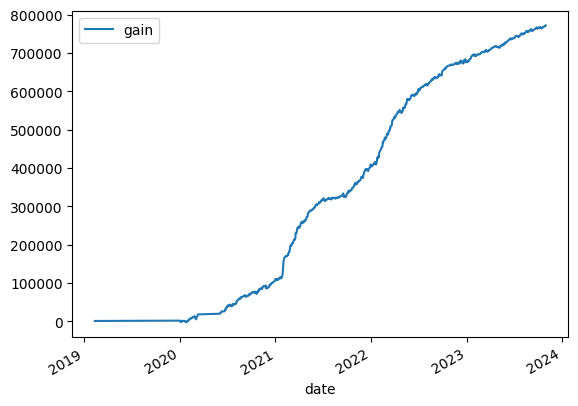

In [101]:
dayGain2023.plot.line('date','gain') #100 GRID line

<Axes: xlabel='date'>

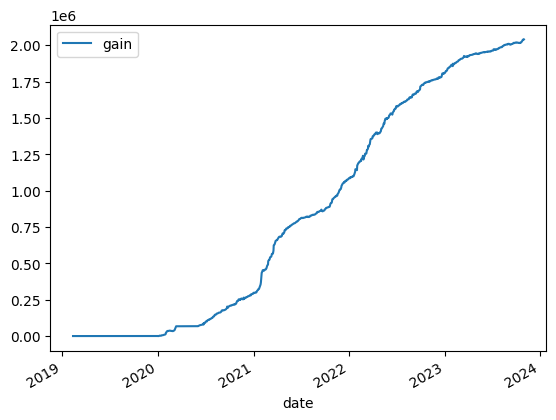

In [60]:
dayGain2023.plot.line('date','gain') #50 GRID lines